# 1단계 미션: 모형 3개 이상 사용

seed # 20190730

In [1]:
# 1) 전처리
# 2) 데이터 탐색
# 3) 훈련 셋(0.7*0.7), 검증 셋(0.7*0.3), 테스트 셋 분리(0.3)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
np.random.seed(20190730)

# 1. 데이터 탐색

In [3]:
# 엑셀 데이터 불러오기
data = pd.read_excel('./default of credit card clients.xls', header=1)

In [4]:
# 데이터 확인하기
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
# 특성 변수들 파악
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

data.info() 결과를 보면..

1) 결측값이 없고, 명목형 변수도 숫자로 변경되어 있음

2) ID 변수는 분석에 필요 없는 변수이므로 제거

In [26]:
# 향후 데이터셋 변경에 활용하기 위해 컬럼명을 출력해 둠
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
# id는 분석에 필요 없으므로 제거
del data['ID']

In [28]:
# 종속변수와 나머지 독립변수의 상관관계 파악
corr_matrix= data.corr() # 데이터셋의 correlation
corr_matrix['default payment next month'].sort_values(ascending=False) # 종속변수를 비교 기준으로 정하고 내림차순 정렬

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment next month, dtype: float64

상관관계 결과를 보면,

1) LIMIT_BAL과 PAY 변수들을 제외한 나머지 변수들은 설명력이 떨어지는 것을 알 수 있다. 

2) PAY 변수들이 시간순으로 나열된 것을 보면, 최근에 연체 월수가 클수록 양의 상관관계를 가진다는 것을 알 수 있다. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC519507B8>,
      dtype=object)

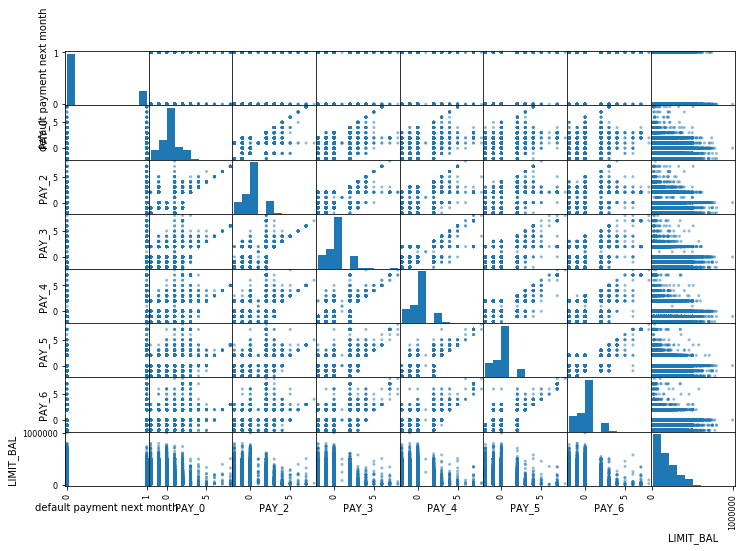

In [11]:
# 종속변수와 독립변수의 관계를 그래프로 시각화
from pandas.plotting import scatter_matrix
attributes = ['default payment next month', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL']
scatter_matrix(data[attributes], figsize=(12,8))


In [609]:
# 변수별 분포 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


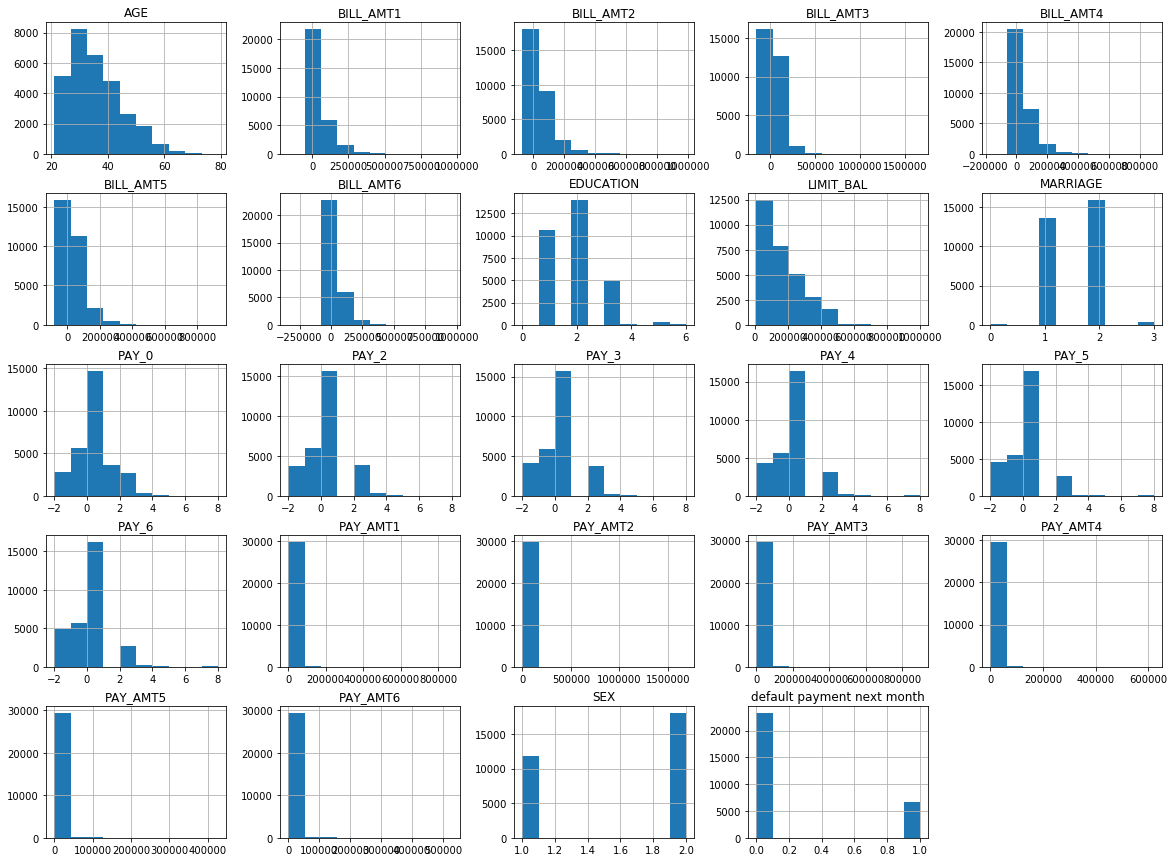

In [13]:
# 변수들의 분포 시각화
%matplotlib inline
data.hist(figsize=(20,15))
plt.show()

클래스 레이블의 분포가 한쪽으로 치우쳐 있으므로(대략 0: 80%, 1: 20%) 계층적 샘플링을 할 예정


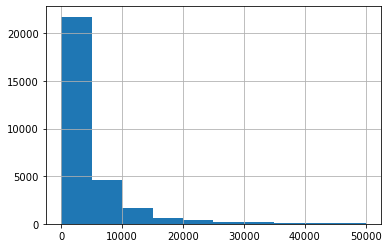

In [836]:
data['PAY_AMT1'].hist(range=(0,50000))

In [838]:
a = data['PAY_AMT1'].values
a= np.array([a])
print(np.mean(a)) 
print(np.median(a))

5663.5805
2100.0


PAY_AMT 변수는 최대값이 약 500,000인 반면, 평균이 5663이므로 바로 정규화하기에 무리가 있다고 판단하였음.

따라서 로그를 취해서 범위를 좁히고 정규화를 진행할 예정

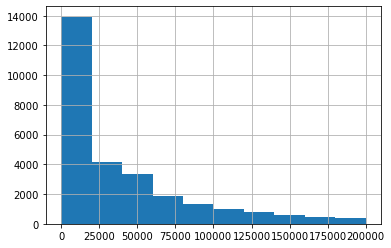

In [660]:
# PAY_AMT1~6의 분포가 0~5000정도 사이에 몰려있고 이상치와의 차이가 매우 큼
data['BILL_AMT2'].hist(range=(0,200000))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce734778d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce73477f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce73477780>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce7347f668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce7347f9b0>],
 'means': []}

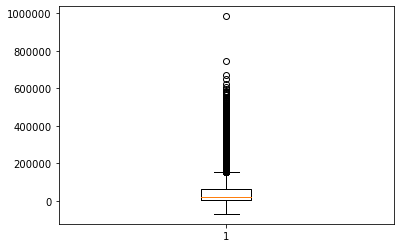

In [630]:
plt.boxplot(data['BILL_AMT2'])

BILL_AMT 변수도 이상치가 매우 크므로, 로그 변환 후에 정규화를 하려고 했으나, 마이너스 값이 존재해서 불가능한 상태이다.

따라서 임의로 이상치를 200,000 이상으로 지정하고, 200,000 이상의 값을 200,000으로 변경하여 최대값을 조절할 예정

In [14]:
# 중앙값 기준으로 전처리
from sklearn.preprocessing import StandardScaler, RobustScaler

def preprocessing_Robust(dataset):
    x_RobustScaler = RobustScaler().fit_transform(dataset)
    return x_RobustScaler

# 2. 데이터 전처리

In [33]:
data2 = data.copy() # 원본 데이터의 손상을 막기 위해 복사

# 이상치를 200,000 이상으로 지정하고, 200,000 이상의 값을 200,000으로 변경하여 최대값을 조절

data2['BILL_AMT1'] = np.where(data2['BILL_AMT1']>=200000, 200000, data2['BILL_AMT1'])
data2['BILL_AMT2'] = np.where(data2['BILL_AMT2']>=200000, 200000, data2['BILL_AMT2'])
data2['BILL_AMT3'] = np.where(data2['BILL_AMT3']>=200000, 200000, data2['BILL_AMT3'])
data2['BILL_AMT4'] = np.where(data2['BILL_AMT4']>=200000, 200000, data2['BILL_AMT4'])
data2['BILL_AMT5'] = np.where(data2['BILL_AMT5']>=200000, 200000, data2['BILL_AMT5'])
data2['BILL_AMT6'] = np.where(data2['BILL_AMT6']>=200000, 200000, data2['BILL_AMT6'])


In [34]:
import math
from sklearn import preprocessing
# 1) 기존의 변수들이 너무 상관관계가 낮아서, 모델의 예측력을 높이기 위해 가정에 따라 그럴 듯한 변수들을 생성
# 가설 1 : 4~9월 동안, 연체한 달의 합이 클 수록 다음 달에도 연체할 것이다.
# PAY 변수를 모두 더한 PAY_POINT 변수 추가
data2['PAY_POINT']= data2['PAY_0'] +  data2['PAY_2'] +  data2['PAY_3'] +  data2['PAY_4'] +  data2['PAY_5'] + data2['PAY_6']

# 가설 3 : '고지서 / 지불한 금액', 지불한 금액에 비해 남아있는 빚이 클수록 다음 달에 연체할 것이다.
data2['BILL_PAID1']= data['BILL_AMT1']/(data['PAY_AMT1']+1)
data2['BILL_PAID2']= data['BILL_AMT2']/(data['PAY_AMT2']+1)
data2['BILL_PAID3']= data['BILL_AMT3']/(data['PAY_AMT3']+1)
data2['BILL_PAID4']= data['BILL_AMT4']/(data['PAY_AMT4']+1)
data2['BILL_PAID5']= data['BILL_AMT5']/(data['PAY_AMT5']+1)
data2['BILL_PAID6']= data['BILL_AMT6']/(data['PAY_AMT6']+1)

# 가설 2 : 고지서 평균이 클수록 다음 달에 연체할 것이다.
data2['BILL_MEAN']= (data2['BILL_AMT1']+ data2['BILL_AMT2'] + data2['BILL_AMT3'] + data2['BILL_AMT4'] + data2['BILL_AMT5'] + data2['BILL_AMT6'])/6
# 가설 4 : '잔고 - 고지서'이 클수록 다음 달에 연체할 것이다.
data2['LIMIT_BILL']= data2['LIMIT_BAL']-data2['BILL_AMT1']

# PAY 변수가  0 미만이면 돈을 안 낸 것이므로, 0 미만의 값을 0으로 변경
data2['PAY_0'] = np.where( (data['PAY_0']==-2 | -1), 0, data['PAY_0'])
data2['PAY_2'] = np.where( (data['PAY_2']==-2 | -1), 0, data['PAY_2'])
data2['PAY_3'] = np.where( (data['PAY_3']==-2 | -1), 0, data['PAY_3'])
data2['PAY_4'] = np.where( (data['PAY_4']==-2 | -1), 0, data['PAY_4'])
data2['PAY_5'] = np.where( (data['PAY_5']==-2 | -1), 0, data['PAY_5'])
data2['PAY_6'] = np.where( (data['PAY_6']==-2 | -1), 0, data['PAY_6'])

# PAY_AMT 변수의 범위를 좁히기 위해 로그 변환
data2['log_PAY_AMT1']=  preprocessing.scale(np.log(data['PAY_AMT1']+1)) # 로그
data2['log_PAY_AMT2']=  preprocessing.scale(np.log(data['PAY_AMT2']+1)) # 로그
data2['log_PAY_AMT3']=  preprocessing.scale(np.log(data['PAY_AMT3']+1)) # 로그
data2['log_PAY_AMT4']=  preprocessing.scale(np.log(data['PAY_AMT4']+1)) # 로그
data2['log_PAY_AMT5']=  preprocessing.scale(np.log(data['PAY_AMT5']+1)) # 로그
data2['log_PAY_AMT6']=  preprocessing.scale(np.log(data['PAY_AMT6']+1)) # 로그

In [35]:
# 전처리 후, 필요 없는 변수 제거
del data2['BILL_AMT1']
del data2['BILL_AMT2']
del data2['BILL_AMT3']
del data2['BILL_AMT4']
del data2['BILL_AMT5']
del data2['BILL_AMT6']

del data2['PAY_AMT1']
del data2['PAY_AMT2']
del data2['PAY_AMT3']
del data2['PAY_AMT4']
del data2['PAY_AMT5']
del data2['PAY_AMT6']

In [8]:
corr_matrix= data2.corr()
corr_matrix['default payment next month'].sort_values(ascending=False)

default payment next month    1.000000
PAY_0                         0.333387
PAY_POINT                     0.281955
PAY_2                         0.255995
PAY_3                         0.223012
PAY_4                         0.203127
PAY_5                         0.190016
PAY_6                         0.174137
BILL_PAID1                    0.109885
BILL_PAID2                    0.099859
BILL_PAID4                    0.087369
BILL_PAID3                    0.085410
BILL_PAID6                    0.075997
BILL_PAID5                    0.067924
EDUCATION                     0.028006
AGE                           0.013890
BILL_MEAN                    -0.018703
MARRIAGE                     -0.024339
SEX                          -0.039961
log_PAY_AMT5                 -0.109828
log_PAY_AMT6                 -0.111352
log_PAY_AMT4                 -0.126043
log_PAY_AMT3                 -0.139197
LIMIT_BILL                   -0.141471
log_PAY_AMT2                 -0.150030
LIMIT_BAL                

1) 이전에 비해 상관관계가 전반적으로 올라간 것을 확인할 수 있음

2) 특히 PAY_POINT는 두번째로 상관관계가 높은 변수가 되었으므로 학습 결과에 상대적으로 큰 영향을 끼칠 것으로 예상됨

In [36]:
# 각 특성을 0~1 범위로 정규화 
min1 = np.min(data2, 0) # 각 열마다 최소값 
max1 = np.max(data2, 0) # 각 열마다 최대값 
data2_pre = (data2-min1)/(max1-min1) # 정규화: (X-min) / (max - min)
data2_pre.head() # 정규화된 데이터

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_PAID5,BILL_PAID6,BILL_MEAN,LIMIT_BILL,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6
0,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.2,0.2,0.0,...,0.085070,0.102083,0.223896,0.147921,0.000000,0.455937,0.000000,0.000000,0.000000,0.000000
1,0.111111,1.0,0.333333,0.666667,0.086207,0.2,0.4,0.2,0.2,0.2,...,0.091374,0.102087,0.229998,0.257954,0.000000,0.481888,0.504077,0.517933,0.000000,0.576820
2,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.085097,0.102090,0.285051,0.196479,0.535500,0.510146,0.504077,0.517933,0.532942,0.646329
3,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.085119,0.102148,0.369464,0.133707,0.555645,0.530860,0.517368,0.525071,0.538084,0.524260
4,0.040404,0.0,0.333333,0.333333,0.620690,0.2,0.2,0.2,0.2,0.2,...,0.085121,0.102145,0.290054,0.175416,0.555645,0.733080,0.672013,0.682587,0.504241,0.494919


In [37]:
# 클래스 레이블의 분포가 치우침(대략 0: 80%, 1: 20%)
# 클래스 레이블 Y를 기준으로 계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit
def StratifiedShuffleSplit_datasets(data):
    split= StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42) # n_splits: 셔플링이랑 분할 반복 횟수

    # 데이터셋을 소득 카테고리 기준(여기선 y_label 취급)으로 나눔
    # split.split(): 훈련, 테스트셋의 각 인덱스 이터러블 배열이 나옴
    for train_index, test_index in split.split(data, data['default payment next month']):
        # 해당 인덱스의 인스턴스가 하나씩 추가됨
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]
    train_labels= np.array(strat_train_set['default payment next month'])
    test_labels = np.array(strat_test_set['default payment next month'])
    train_set = strat_train_set.drop('default payment next month', axis=1)   
    train_set = train_set.values
    test_set = strat_test_set.drop('default payment next month', axis=1)
    test_set = test_set.values
    return train_set, train_labels, test_set, test_labels, strat_train_set, strat_test_set

In [38]:
train_set, train_labels, test_set, test_labels, strat_train_set, strat_test_set= StratifiedShuffleSplit_datasets(data2_pre)

In [41]:
# smote
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SVMSMOTE

# 모델설정
sm = SVMSMOTE(sampling_strategy=0.7)

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_sample(train_set,list(train_labels))

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, the shape of train_X: (27803, 23)
After OverSampling, the shape of train_y: (27803, 23) 

After OverSampling, counts of label '1': 11448
After OverSampling, counts of label '0': 16355


# 3. 모델 생성 

### 3-1) Voting 분류기( 로지스틱, 랜덤포레스트, svm 조합)

In [13]:
# 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(C=100, random_state=42)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(train_set, train_labels)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                             

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(train_set, train_labels)
    y_pred = clf.predict(test_set)
    print(clf.__class__.__name__, f1_score(test_labels, y_pred))
    print(clf.__class__.__name__, accuracy_score(test_labels, y_pred))                                         

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LogisticRegression 0.0
LogisticRegression 0.7787777777777778
RandomForestClassifier 0.4118037135278515
RandomForestClassifier 0.8028888888888889


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.029055690072639227
SVC 0.7772222222222223


C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.022626660108214465
VotingClassifier 0.7792222222222223


### PAY_POINT를 추가하여서 성능이 개선된 것을 확인함
### 원 데이터(svmsmote=0.7)
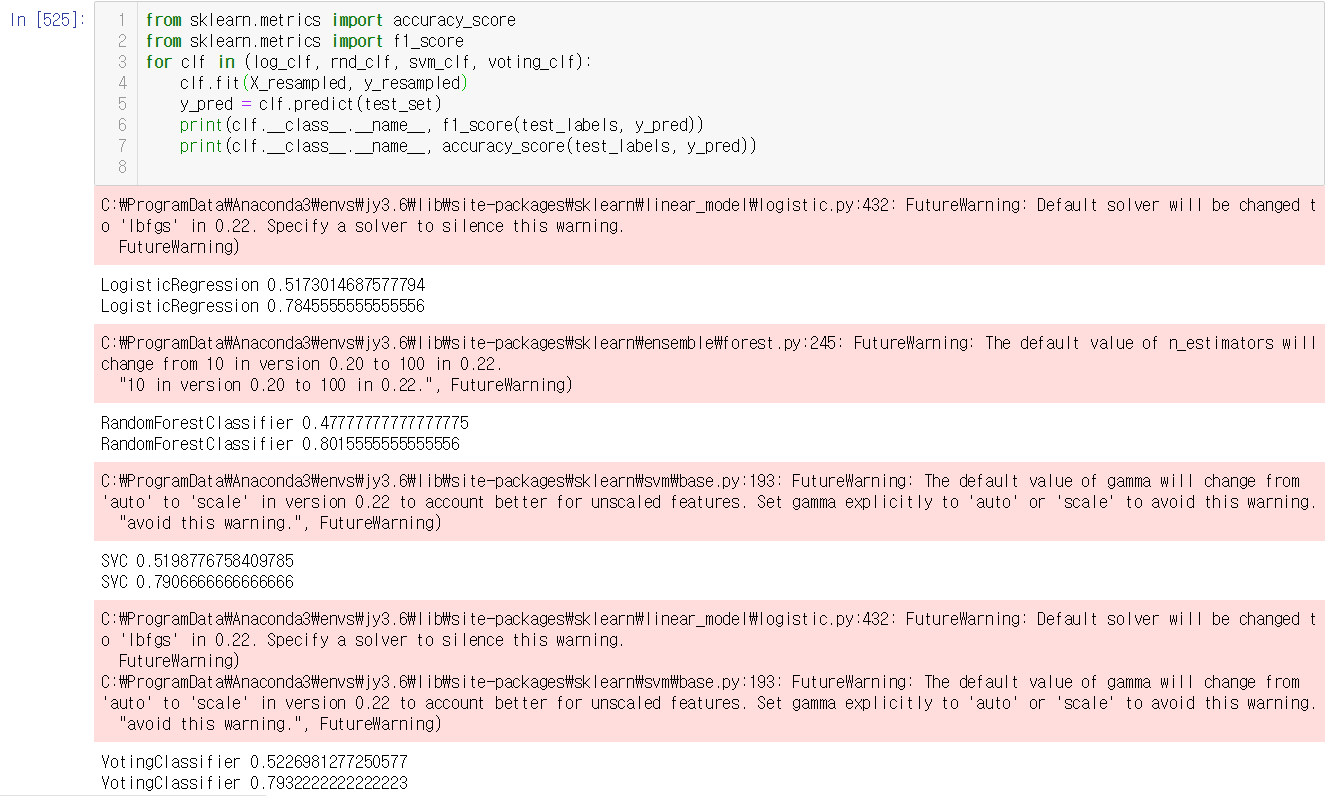


### PAY_POINT 넣기 전(svmsmote=0.7)
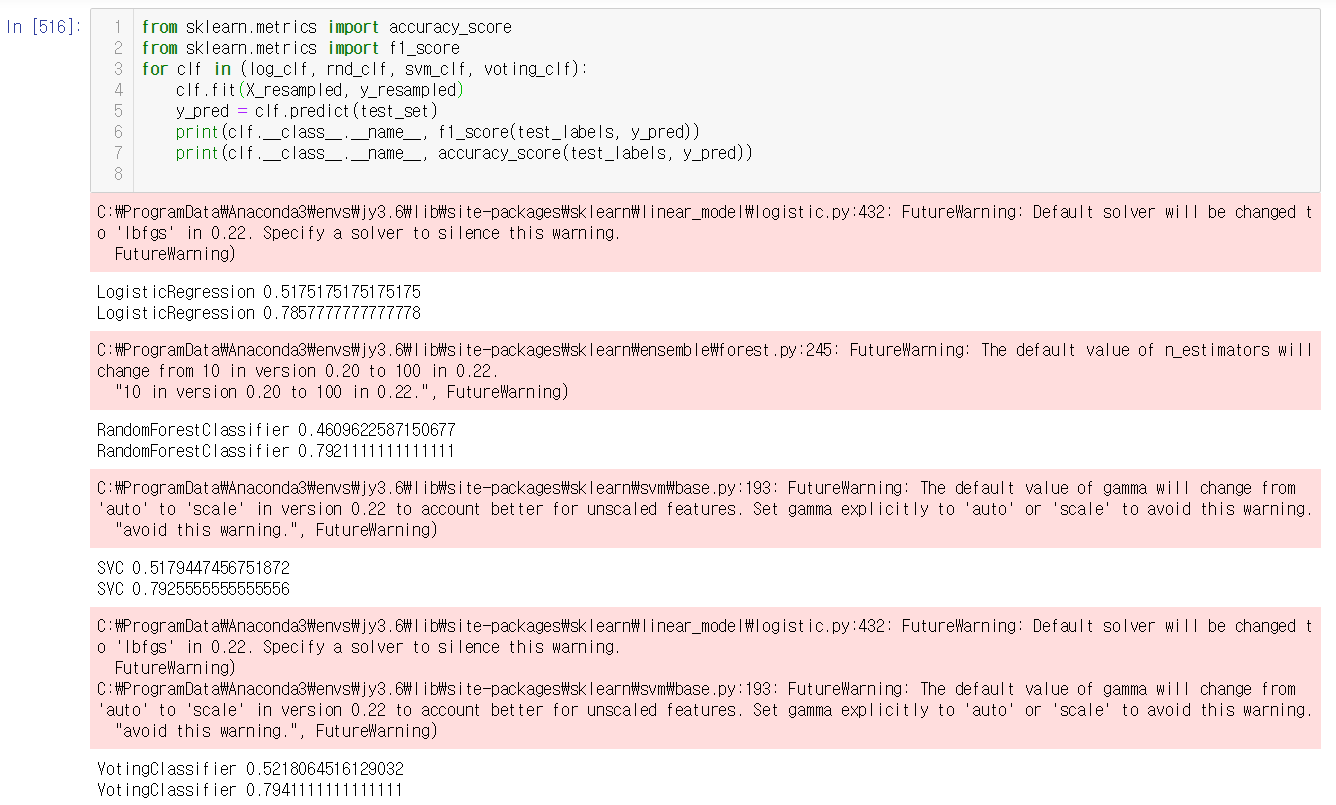

### PAY_POINT 넣은 후(svmsmote=0.7)
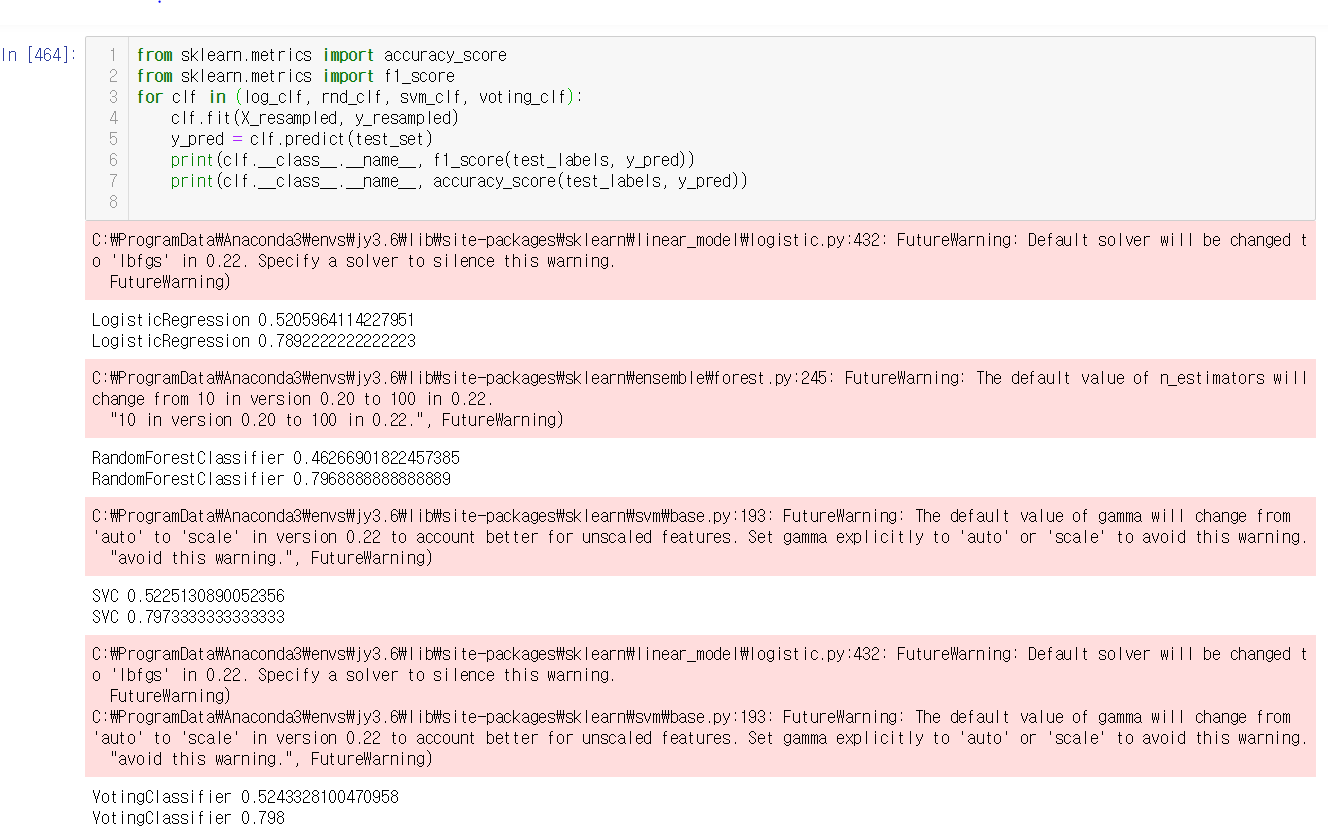

### 3-2) Bagging( 랜덤포레스트 조합)

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

bagging_clf = BaggingClassifier(RandomForestClassifier(random_state=42), n_estimators=40, random_state=0).fit(train_set, train_labels)
y_pred = bagging_clf.predict(test_set)
print(bagging_clf.__class__.__name__, f1_score(test_labels, y_pred))
print(bagging_clf.__class__.__name__, accuracy_score(test_labels, y_pred))

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\jy

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\jy

BaggingClassifier 0.46942042907460774
BaggingClassifier 0.8158888888888889


### 3-3) GradientBoost

GradientBoost 모델이 가장 성능이 좋아서, smote를 한 훈련 데이터와 안 한 훈련 데이터를 모두 학습시켜보았고 그리드 서치도 실행하였다.

In [40]:
# Smote 안 한 훈련데이터 사용
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.075, 0.1, 0.15],
    "max_depth":[3,4,5,6,7,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[15,20,25]
    }
gbc_clf= GridSearchCV(GradientBoostingClassifier(),
                      parameters).fit(train_set, train_labels)
                      
y_pred = gbc_clf.predict(test_set)
print(gbc_clf.__class__.__name__, f1_score(test_labels, y_pred))
print(gbc_clf.__class__.__name__, accuracy_score(test_labels, y_pred))
print(gbc_clf.best_params_)

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [17]:
print(gbc_clf.__class__.__name__, f1_score(test_labels, y_pred))
print(gbc_clf.__class__.__name__, accuracy_score(test_labels, y_pred))
print(gbc_clf.best_params_)

GridSearchCV 0.45883501464367066
GridSearchCV 0.8152222222222222
{'learning_rate': 0.15, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 25}


In [39]:
from sklearn.feature_selection import SelectFromModel
parameters = {
    "":[],
    "learning_rate": [0.15],
    "":[5],
    "":[],
    "":[25]
    }
gbc_clf= GradientBoostingClassifier(loss="deviance", max_depth=5, 
                                   max_features="sqrt", n_estimators=25).fit(train_set, train_labels)
select = SelectFromModel(gbc_clf, threshold='median', prefit=True)

train_set2 = select.transform(train_set)
test_set2 = select.transform(test_set)

gbc_clf.fit(train_set2, train_labels)
y_pred = gbc_clf.predict(test_set2)
print(gbc_clf.__class__.__name__, f1_score(test_labels, y_pred))
print(gbc_clf.__class__.__name__, accuracy_score(test_labels, y_pred))

GradientBoostingClassifier 0.4519326065411298
GradientBoostingClassifier 0.8156666666666667


In [41]:
train_set[1]

array([0.09090909, 1.        , 0.16666667, 0.66666667, 0.15517241,
       0.2       , 0.2       , 0.2       , 0.2       , 0.4       ,
       0.2       , 0.29166667, 0.01388679, 0.03101517, 0.04254536,
       0.15847744, 0.0851025 , 0.10214284, 0.38700375, 0.20827935,
       0.62260171, 0.64243183, 0.67201329, 0.        , 0.61357343,
       0.57435348])

In [31]:
train_set[1]

array([0.2       , 0.2       , 0.2       , 0.4       , 0.29166667,
       0.38700375, 0.20827935])

In [59]:
# Smote 한 훈련데이터 사용

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.075, 0.1, 0.15],
    "max_depth":[3,4,5,6,7,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[15,20,25]
    }
gbc_clf= GridSearchCV(GradientBoostingClassifier(),
                      parameters, cv=3).fit(X_resampled, y_resampled) # smote한 데이터를 적용해 봄
#gbc_clf= GradientBoostingClassifier().fit(train_set, train_labels)
                      
y_pred = gbc_clf.predict(test_set)
print(gbc_clf.__class__.__name__, f1_score(test_labels, y_pred))
print(gbc_clf.__class__.__name__, accuracy_score(test_labels, y_pred))
print(gbc_clf.best_params_)

GridSearchCV 0.4989786985701779
GridSearchCV 0.8092222222222222
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 20}


### 3-4) DNN

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras import optimizers

In [49]:
# 모델 생성
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(23,)))
model.add(Dropout(0.7))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                1536      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 65        
Total params: 9,921
Trainable params: 9,921
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 학습
RMSprop = optimizers.RMSprop(lr=0.001)
model.compile(loss='mean_squared_error',
              optimizer = RMSprop,
              metrics = ['mean_absolute_error','acc'])
model.fit(train_set, train_labels, epochs = 150, batch_size=128)

# 모델 평가
model.evaluate(test_set,test_labels)

Epoch 1/150
21000/21000 [==============================] - 1s 61us/step - loss: 0.7764 - mean_absolute_error: 0.7764 - acc: 0.2236
Epoch 2/150
21000/21000 [==============================] - 1s 33us/step - loss: 0.7786 - mean_absolute_error: 0.7786 - acc: 0.2214
Epoch 3/150
21000/21000 [==============================] - 1s 32us/step - loss: 0.7787 - mean_absolute_error: 0.7787 - acc: 0.2213
Epoch 4/150
21000/21000 [==============================] - 1s 32us/step - loss: 0.7783 - mean_absolute_error: 0.7783 - acc: 0.2217
Epoch 5/150
21000/21000 [==============================] - 1s 35us/step - loss: 0.7786 - mean_absolute_error: 0.7786 - acc: 0.2213
Epoch 6/150
21000/21000 [==============================] - 1s 32us/step - loss: 0.7786 - mean_absolute_error: 0.7786 - acc: 0.2214
Epoch 7/150
21000/21000 [==============================] - 1s 32us/step - loss: 0.7787 - mean_absolute_error: 0.7787 - acc: 0.2213
Epoch 8/150
21000/21000 [==============================] - 1s 34us/step - loss: 0.7

KeyboardInterrupt: 

In [56]:
strat_train_set[strat_train_set['default payment next month']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4645 entries, 1710 to 13468
Data columns (total 24 columns):
LIMIT_BAL                     4645 non-null int64
SEX                           4645 non-null int64
EDUCATION                     4645 non-null int64
MARRIAGE                      4645 non-null int64
AGE                           4645 non-null int64
PAY_0                         4645 non-null int64
PAY_2                         4645 non-null int64
PAY_3                         4645 non-null int64
PAY_4                         4645 non-null int64
PAY_5                         4645 non-null int64
PAY_6                         4645 non-null int64
BILL_AMT1                     4645 non-null int64
BILL_AMT2                     4645 non-null int64
BILL_AMT3                     4645 non-null int64
BILL_AMT4                     4645 non-null int64
BILL_AMT5                     4645 non-null int64
BILL_AMT6                     4645 non-null int64
PAY_AMT1                      4645 non-

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SelectFromModel

#poly_svm_clf = Pipeline([
#    ('poly_features', PolynomialFeatures(degree=3)),
#    ('svm_clf', LinearSVC(C=100, loss='hinge',max_iter=2000, random_state=42))])
poly_svm_clf = SVC(C=50, kernel='poly',degree=3, coef0=5).fit(train_set,train_labels)

select = SelectFromModel(poly_svm_clf, threshold='median',prefit=True)

train_set2 = select.transform(train_set)
test_set2 = select.transform(train_set)

poly_svm_clf.fit(train_set2, train_labels)

y_pred = poly_svm_clf.predict(train_set2)
print(poly_svm_clf.__class__.__name__, f1_score(train_labels, y_pred))
print(poly_svm_clf.__class__.__name__, accuracy_score(train_labels, y_pred))

y_pred = poly_svm_clf.predict(test_set2)
print(poly_svm_clf.__class__.__name__, f1_score(test_labels, y_pred))
print(poly_svm_clf.__class__.__name__, accuracy_score(test_labels, y_pred))

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: The underlying estimator SVC has no `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to SelectFromModel or call fit before calling transform.

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
y_pred = poly_svm_clf.predict(train_set)
print(poly_svm_clf.__class__.__name__, f1_score(train_labels, y_pred))
print(poly_svm_clf.__class__.__name__, accuracy_score(train_labels, y_pred))

SVC 0.48136467889908263
SVC 0.8277142857142857


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature selection import SelectFromModel
y_pred = poly_svm_clf.predict(test_set)
print(poly_svm_clf.__class__.__name__, f1_score(test_labels, y_pred))
print(poly_svm_clf.__class__.__name__, accuracy_score(test_labels, y_pred))

SVC 0.439057239057239
SVC 0.8148888888888889


# 4. 전처리 추가 시도
### 4-1) VAE를 통해 데이터 생성

In [15]:
from keras.layers import Input
from keras.layers import *
from keras import backend as K
from keras.models import Model
from keras.losses import mse, binary_crossentropy


batch_size= 128
epochs= 300
original_dim= 27
intermediate_dim= 500
latent_dim= 10
#encoder
x = Input(shape=(original_dim,))
y = Dense(intermediate_dim, activation='relu')(x)
z = Dropout(0.7)(y)
h = Dense(intermediate_dim, activation='relu')(y)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(latent_dim,),
                               mean=0.0,stddev=1.0)
    return z_mean + K.exp(z_log_sigma) * epsilon

# Tensorflow 백엔드에서는 "output_shape"가 필요하지 않습니다.
# 따라서, `Lambda(sampling)([z_mean, z_log_sigma])` 라고 쓸 수 있습니다. 
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

#decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_h_drop = Dropout(0.7)
decoder_h2 = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim,activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, 입력과 잠재공간을 매핑
encoder = Model(x, z_mean)

# generator, 잠재공간과 재구성된 입력을 매핑
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss
rmsprop = optimizers.RMSprop(lr=0.00001)
vae.compile(optimizer=rmsprop, loss=vae_loss)

x_train= strat_train_set[strat_train_set['default payment next month']==1].values
x_test = strat_test_set[strat_test_set['default payment next month']==1].values

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Train on 4645 samples, validate on 1991 samples
Epoch 1/300
4645/4645 [==============================] - 1s 149us/step - loss: 0.6867 - val_loss: 0.6879
Epoch 2/300
4645/4645 [==============================] - 0s 49us/step - loss: 0.6870 - val_loss: 0.6798
Epoch 3/300
4645/4645 [==============================] - 0s 46us/step - loss: 0.6863 - val_loss: 0.6843
Epoch 4/300
4645/4645 [==============================] - 0s 46us/step - loss: 0.6800 - val_loss: 0.6815
Epoch 5/300
4645/4645 [==============================] - 0s 48us/step - loss: 0.6775 - val_loss: 0.6770
Epoch 6/300
4645/4645 [==============================] - 0s 46us/step - loss: 0.6756 - val_loss: 0.6767
Epoch 7/300
4645/4645 [==============================] - 0s 46us/step - loss: 0.6769 - val_loss: 0.6727
Epoch 8/300
4645/4645 [==============================] - 0s 46us/step - loss: 0.6699 - val_loss: 0.6684
Epoch 9/300
4645/4645 [==============================] - 0s 47us/step - loss: 0.6704 - val_loss: 0.6691
Epoch 10/300
46

4645/4645 [==============================] - 0s 51us/step - loss: 0.5208 - val_loss: 0.5170
Epoch 156/300
4645/4645 [==============================] - 0s 49us/step - loss: 0.5210 - val_loss: 0.5259
Epoch 157/300
4645/4645 [==============================] - 0s 50us/step - loss: 0.5208 - val_loss: 0.5203
Epoch 158/300
4645/4645 [==============================] - 0s 51us/step - loss: 0.5214 - val_loss: 0.5205
Epoch 159/300
4645/4645 [==============================] - 0s 50us/step - loss: 0.5203 - val_loss: 0.5218
Epoch 160/300
4645/4645 [==============================] - 0s 50us/step - loss: 0.5178 - val_loss: 0.5178
Epoch 161/300
4645/4645 [==============================] - 0s 53us/step - loss: 0.5208 - val_loss: 0.5187
Epoch 162/300
4645/4645 [==============================] - 0s 53us/step - loss: 0.5204 - val_loss: 0.5193
Epoch 163/300
4645/4645 [==============================] - 0s 50us/step - loss: 0.5195 - val_loss: 0.5188
Epoch 164/300
4645/4645 [==============================] - 0

In [105]:
# 타겟 값이 1인 10000개의 데이터 생성
train_generated_target1= np.zeros(shape=(4645,27))
for i in range(4645):
    z_sample = np.random.normal(loc=0,scale=1,size=10).reshape(1,10)
    x_decoded = generator.predict(z_sample)
    x_decoded = np.squeeze(x_decoded)
    train_generated_target1[i]=x_decoded

In [101]:
strat_train_set.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month',
       'PAY_POINT', 'BILL_PAID1', 'BILL_PAID2', 'BILL_PAID3', 'BILL_PAID4',
       'BILL_PAID5', 'BILL_PAID6', 'BILL_MEAN', 'LIMIT_BILL', 'log_PAY_AMT1',
       'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5',
       'log_PAY_AMT6'],
      dtype='object')

In [106]:
from pandas import DataFrame
strat_train_set.columns
train_generated_target1_df = DataFrame(train_generated_target1, columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month',
       'PAY_POINT', 'BILL_PAID1', 'BILL_PAID2', 'BILL_PAID3', 'BILL_PAID4',
       'BILL_PAID5', 'BILL_PAID6', 'BILL_MEAN', 'LIMIT_BILL', 'log_PAY_AMT1',
       'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5',
       'log_PAY_AMT6'])
%matplotlib inline
train_generated_target1_df.hist(figsize=(20,15))
plt.show()

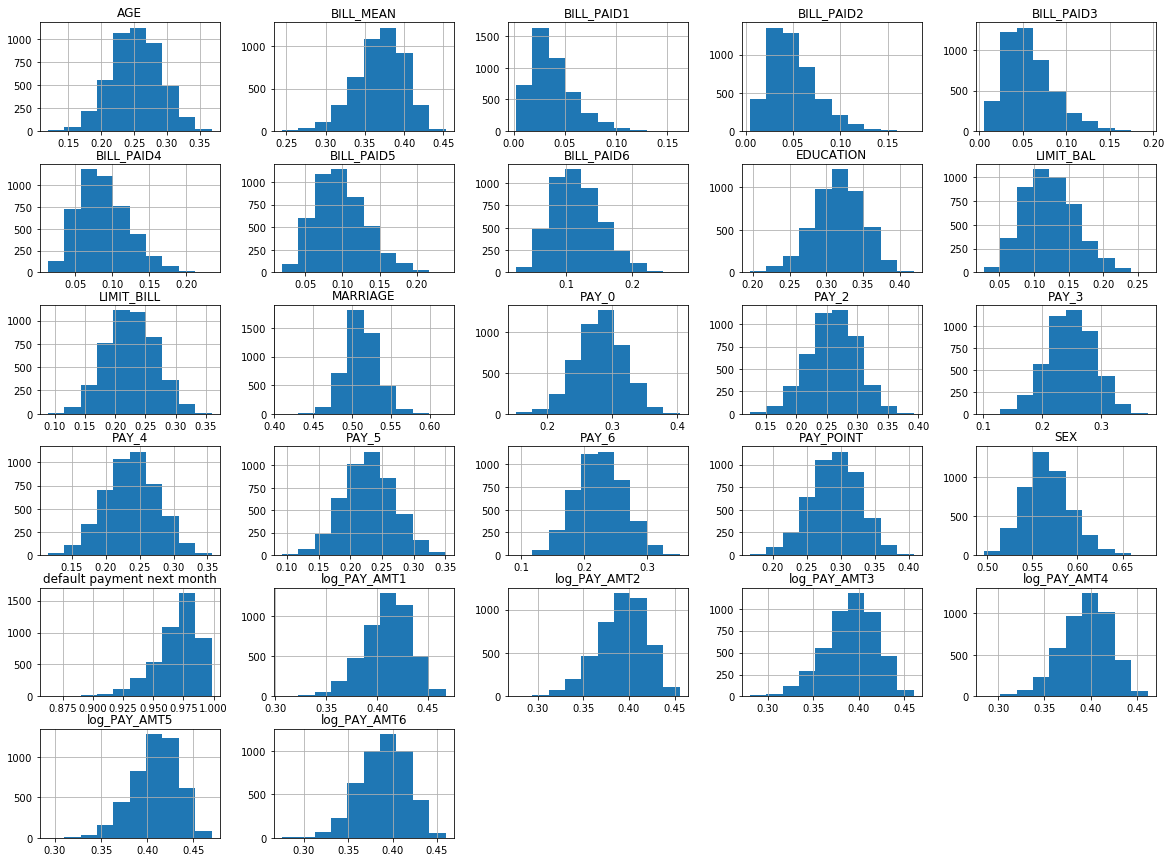

In [107]:
%matplotlib inline
train_generated_target1_df.hist(figsize=(20,15))
plt.show()

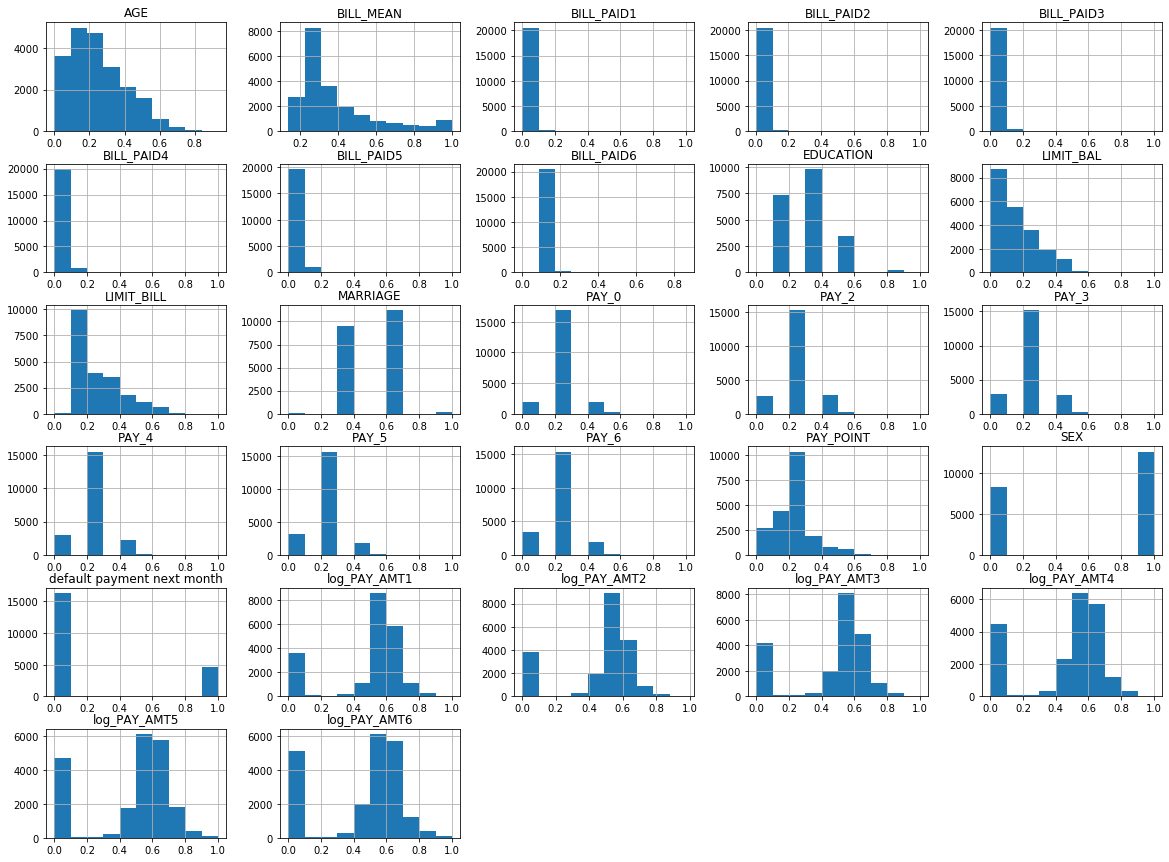

In [166]:
strat_train_set.hist(figsize=(20,15))
plt.show()

In [ ]:
def edit_generated(data):
    data['default payment next month'] = 1
    for column in ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
        #data2['BILL_AMT1'] = np.where(data2['BILL_AMT1']>=200000, 200000, data2['BILL_AMT1'])
        data['PAY_0'] = np.where(data['PAY_0']>= )

추가시도 결론: 

1) 타겟 y=1인 데이터가 부족하므로, smote가 아닌 VAE를 통해 y=1인 데이터를 생성하여 학습시키려 했으나 loss 등의 이유로 인해 값과 분포가 원본과는 전혀 다른 데이터가 나왔다. 명목형 변수가 섞인 데이터를 생성하기가 어렵다는 것을 알게 되었다.

2) 잡음제거 AE로 원본 데이터의 이상치를 제거한 후에 VAE를 시도했으면 더 나은 결과가 나오지 않았을까 하는 추측을 한다



# 2단계

#### Q1. 1단계에서 도출된 결과를 이용하여 각 알고리즘의 장단점과 분석 시 문제점을 정리하시오.


일단 y=0인 데이터가 80% 정도인 것을 봤을 때, 모델의 정확도가 81%대라는 것은 매우 낮은 점수이다. 

<모델별 장단점>

1) Voting: 간편하고, 다양한 모델을 사용할 수 있으므로 다양한 실험이 가능하다. 하지만 boosting보다 느리고 리소스를 많이 잡아먹고 결과에 대한 이해가 어렵다. 

2) Gradient boost: 학습 속도가 매우 빠르고 정확도도 가장 높은 편이다. 디폴트값으로 학습을 시켰을 때에도 다른 모델들보다 높은 성능을 보였다. 하지만 데이터가 충분히 클 때 더 효과적인 모델이라고 한다. 

3) Bagging: 성능이 좋지만 과대적합되기가 쉽다. 

4) DNN: 쉽게 모델을 정의할 수 있다. 층을 자유자재로 조절할 수 있다. 가장 다양하게 모델을 변형시켜가면서 실험을 할 수 있지만 그만큼 불확실하다. 또한, 학습을 할 때마다 결과가 다르다는 단점이 있다. 데이터 양과 변수의 수가 매우 많을 때 상대적으로 효과적이다.

#### Q2. 더 나은 성능을 위해서 고려해야 할 사항들을 도출하시오.

가장 높은 f1 score: GridSearchCV 0.5161653078436884
가장 높은 정확도: GridSearchCV 0.8087777777777778
    
1) 명목형 변수들을 원핫인코딩을 이용하여 더미변수로 만들어서 학습을 시키기

2) Gradient boost 이외의 모델들도 그리드 서치를 이용해 최적의 파라미터 찾기

3) 특성 공학의 기술 적용: sklearn의 SelectFromModel이나 RFE 모듈을 활용하여 최적의 특성 조합 찾기

4) SVM의 학습시간이 너무 오래 걸려서 제외했는데 강력한 분류기이므로 적용해 볼 필요가 있음

5) DNN 모델에 RNN이나 CNN 등을 활용할 방법을 찾아볼 필요가 있음

#### Q3. 결과를 통해 모델에 가장 영향력을 주는 입력변수들은 어떤 것들이 있는지 그 변수들의 특징들로 유추할 수 있는 정보는?

PAY 관련 변수들이 결정적인 영향을 끼치고 있다. 

#### Q4. 유사 적용 가능한 분야 및 사례들을 도출하시오.

1) 대출 상환 예측: 개인의 과거 지출 및 신용 데이터를 바탕으로, 대출한 돈을 갚을지를 예상하는 모델 구축 

2) 게임유저 이탈 예측: 게임 유저의 활동시간, 구매내역 등을 바탕으로 향후 이탈 여부 예측

# 잡음제거 ae

In [133]:
# 2. define model

def build_autoencoder():
    # 입력 정의
    input_x = Input(shape=(27,))
    
    # encoder
    x = Dense(100, activation='relu')(input_x)
    x = Dropout(0.7)(x)
    x = Dense(50, activation='relu')(x)
    x = Dense(10, activation='relu')(x)
    
    # decoder
    x = Dense(10, activation='relu')(x)
    x = Dense(50, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.7)(x)
    x = Dense(27, activation='relu')(x)
   
    # model
    autoencoder = Model(inputs= input_x, outputs= x) # 위의 식과 연결됨
    return autoencoder

In [165]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 27)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 100)               2800      
_________________________________________________________________
dropout_38 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_83 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_84 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_85 (Dense)             (None, 50)                550       
__________

In [135]:
# 3. Define optimizer and loss function
model = build_autoencoder()
model.compile(optimizer=optimizers.Adam(), loss='MSE')

In [136]:
# 4. Train your model
history = model.fit(train_generated_target1, x_train, epochs= epochs, batch_size= batch_size)

Epoch 1/300
4645/4645 [==============================] - 1s 206us/step - loss: 0.1016
Epoch 2/300
4645/4645 [==============================] - 0s 35us/step - loss: 0.0601
Epoch 3/300
4645/4645 [==============================] - 0s 35us/step - loss: 0.0504
Epoch 4/300
4645/4645 [==============================] - 0s 36us/step - loss: 0.0463
Epoch 5/300
4645/4645 [==============================] - 0s 36us/step - loss: 0.0442
Epoch 6/300
4645/4645 [==============================] - 0s 35us/step - loss: 0.0425
Epoch 7/300
4645/4645 [==============================] - 0s 35us/step - loss: 0.0415
Epoch 8/300
4645/4645 [==============================] - 0s 35us/step - loss: 0.0410
Epoch 9/300
4645/4645 [==============================] - 0s 35us/step - loss: 0.0405
Epoch 10/300
4645/4645 [==============================] - 0s 35us/step - loss: 0.0398
Epoch 11/300
4645/4645 [==============================] - 0s 35us/step - loss: 0.0395
Epoch 12/300
4645/4645 [==============================] - 0s 4

4645/4645 [==============================] - 0s 43us/step - loss: 0.0358
Epoch 191/300
4645/4645 [==============================] - 0s 43us/step - loss: 0.0358
Epoch 192/300
4645/4645 [==============================] - 0s 43us/step - loss: 0.0358
Epoch 193/300
4645/4645 [==============================] - 0s 42us/step - loss: 0.0358
Epoch 194/300
4645/4645 [==============================] - 0s 42us/step - loss: 0.0358
Epoch 195/300
4645/4645 [==============================] - 0s 42us/step - loss: 0.0358
Epoch 196/300
4645/4645 [==============================] - 0s 42us/step - loss: 0.0358
Epoch 197/300
4645/4645 [==============================] - 0s 42us/step - loss: 0.0358
Epoch 198/300
4645/4645 [==============================] - 0s 41us/step - loss: 0.0358
Epoch 199/300
4645/4645 [==============================] - 0s 43us/step - loss: 0.0358
Epoch 200/300
4645/4645 [==============================] - 0s 41us/step - loss: 0.0358
Epoch 201/300
4645/4645 [==============================] 

In [137]:
train_generated_target1_sample= np.zeros(shape=(4645,27))
for i in range(4645):
    z_sample = np.random.normal(loc=0,scale=1,size=10).reshape(1,10)
    x_decoded = generator.predict(z_sample)
    x_decoded = np.squeeze(x_decoded)
    train_generated_target1_sample[i]=x_decoded

In [161]:
train_generated_target1_sample.shape

(4645, 27)

In [162]:
train_denoised_target1= np.zeros(shape=(4645,27))
for i in range(4645):
    train_generated_target1_sample= np.zeros(shape=(4645,27))

    x = np.reshape(train_generated_target1_sample[i],(1,27))
    x_decoded = model.predict(x,batch_size=1)
    train_denoised_target1[i]=x_decoded[0]

In [160]:
 x = np.reshape(train_generated_target1_sample[0],(1,27))
x

array([[0.15651134, 0.57159239, 0.36113518, 0.50074947, 0.26971662,
        0.30452323, 0.28843379, 0.29037908, 0.2821618 , 0.25737494,
        0.25177479, 0.94674397, 0.3156091 , 0.05274689, 0.05769366,
        0.06994951, 0.09816691, 0.13245195, 0.17049494, 0.41422743,
        0.2413964 , 0.43944246, 0.40865472, 0.41669217, 0.40875801,
        0.40406522, 0.39472067]])

In [163]:
from pandas import DataFrame
train_denoised_target1_df = DataFrame(train_denoised_target1, columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month',
       'PAY_POINT', 'BILL_PAID1', 'BILL_PAID2', 'BILL_PAID3', 'BILL_PAID4',
       'BILL_PAID5', 'BILL_PAID6', 'BILL_MEAN', 'LIMIT_BILL', 'log_PAY_AMT1',
       'log_PAY_AMT2', 'log_PAY_AMT3', 'log_PAY_AMT4', 'log_PAY_AMT5',
       'log_PAY_AMT6'])


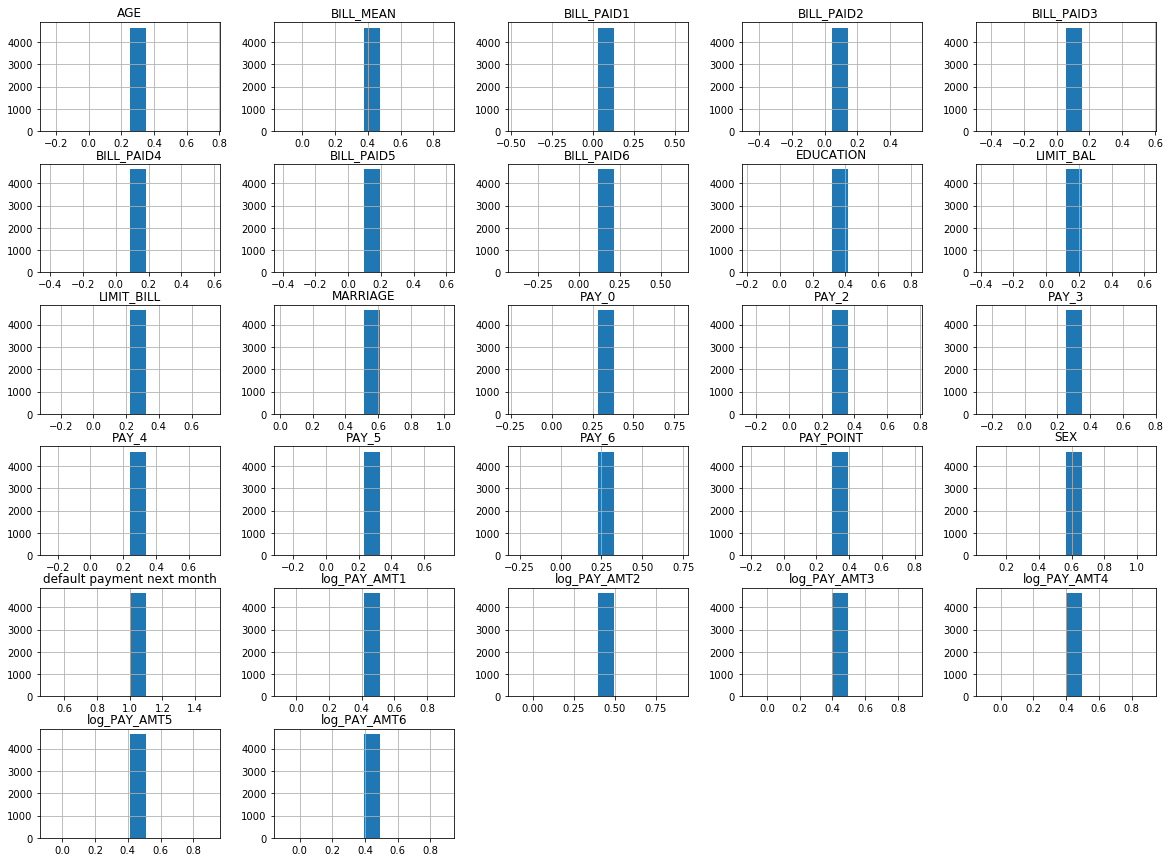

In [164]:
%matplotlib inline
train_denoised_target1_df.hist(figsize=(20,15))
plt.show()

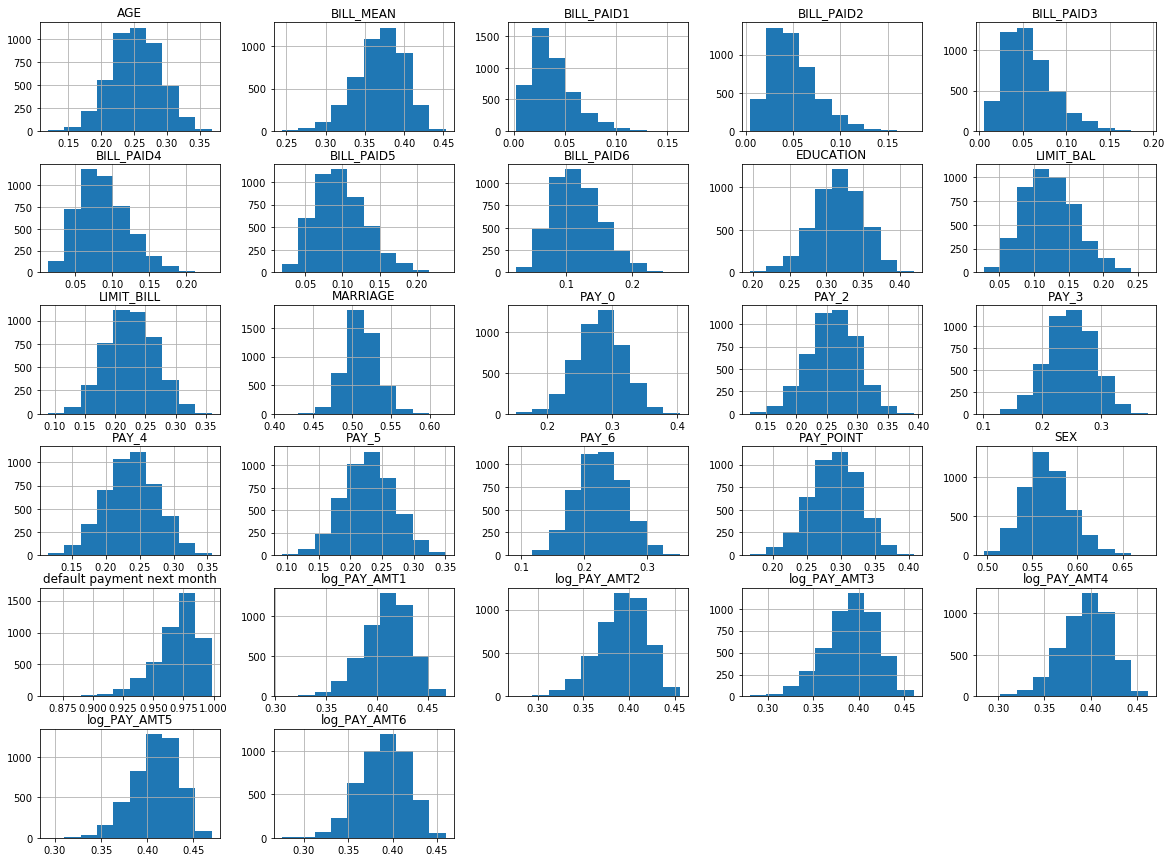

In [154]:
%matplotlib inline
train_generated_target1_df.hist(figsize=(20,15))
plt.show()

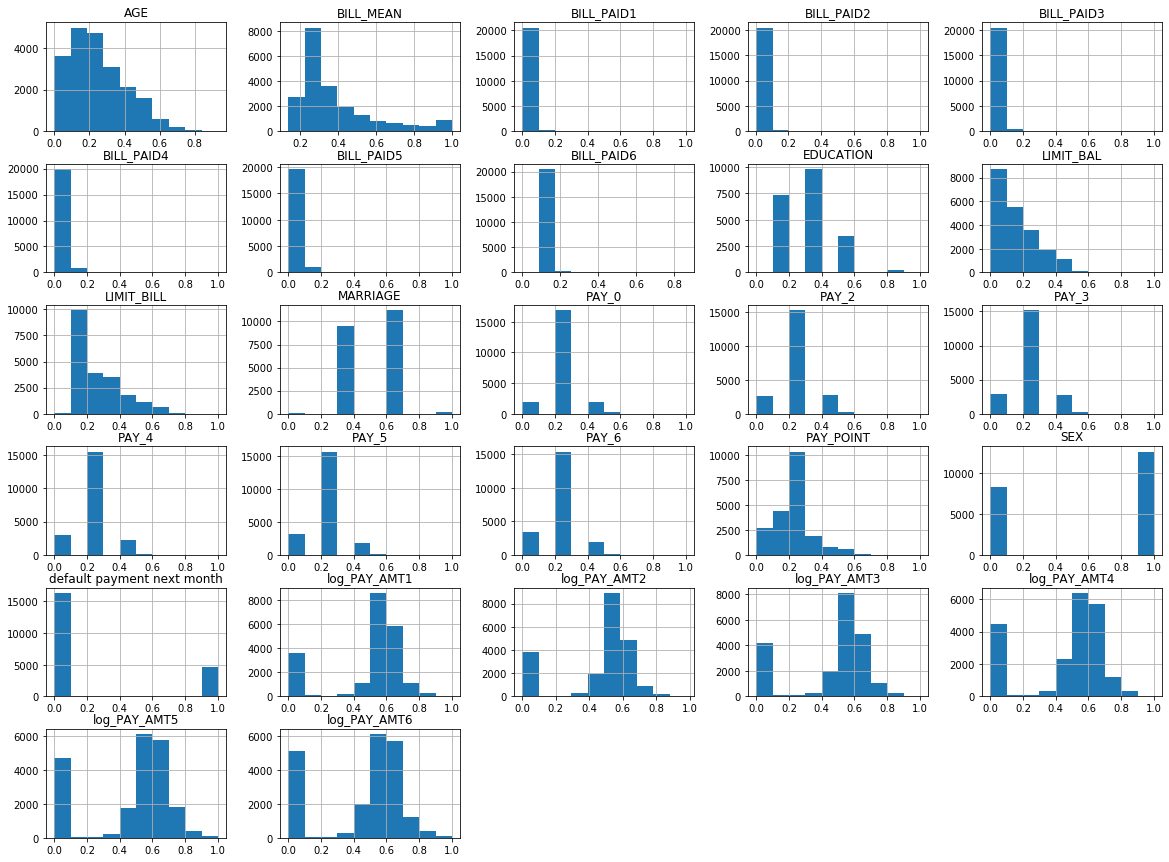

In [141]:
strat_train_set.hist(figsize=(20,15))
plt.show()